Banking Customer Churn Prediction

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9995 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9999 non-null   float64
 13  Exited           9904 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB



**data Cleaning & Preprocessing**
---

In [4]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         5
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     1
Exited             96
dtype: int64

In [5]:
df.dropna(subset='Exited', inplace=True)

In [6]:
df[df['CreditScore'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
433,434,15595039,Manna,NaN,Germany,Female,37,8,114754.08,1,1,0,136050.44,1.0
435,436,15581197,Ricci,NaN,France,Female,51,3,99286.98,1,0,1,85578.63,0.0


In [7]:
df[df['EstimatedSalary'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
458,459,15707362,Yin,514.0,Germany,Male,43,1,95556.31,1,0,1,NaN,1.0


In [8]:
features = [
    'CreditScore',
    'EstimatedSalary',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember'
]

imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(df[features])

df_imputed = pd.DataFrame(imputed_values, columns=features, index=df.index)
df[features] = df_imputed

**Imputer vlaidation**

In [9]:
# MSE for CreditScore (KNN Imputer): 7300.6030112
# MSE for CreditScore (Mean Imputation): 9236.580268441841
# Original: 670.00, Imputed (KNN): 684.20
# Original: 613.00, Imputed (KNN): 637.80
# Original: 566.00, Imputed (KNN): 669.20
# Original: 537.00, Imputed (KNN): 626.20
# Original: 424.00, Imputed (KNN): 608.60
# CreditScore Average: 650.9567424991758

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***Analysis***
---

In [11]:
# Understanding the target
df['Exited'].value_counts()

Exited
0.0    7883
1.0    2021
Name: count, dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     4970
Germany    2482
Spain      2452
Name: count, dtype: int64

In [13]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    6983
0.0    2921
Name: count, dtype: int64

In [14]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5096
0.0    4808
Name: count, dtype: int64

In [15]:
df['NumOfProducts'].value_counts()

NumOfProducts
1.0    5041
2.0    4541
3.0     262
4.0      60
Name: count, dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,9904.0,5.001587e+03,2888.258558,1.00,2.501750e+03,4.986500e+03,7523.25,9999.00
CustomerId,9904.0,1.569097e+07,71958.601237,15565701.00,1.562853e+07,1.569078e+07,15753333.25,15815690.00
CreditScore,9904.0,6.506042e+02,96.599248,350.00,5.840000e+02,6.520000e+02,717.00,850.00
Age,9904.0,3.892023e+01,10.476533,18.00,3.200000e+01,3.700000e+01,44.00,92.00
Tenure,9904.0,5.013833e+00,2.892170,0.00,3.000000e+00,5.000000e+00,8.00,10.00
Balance,9904.0,7.656419e+04,62393.975288,0.00,0.000000e+00,9.726710e+04,127639.05,250898.09
NumOfProducts,9904.0,1.529584e+00,0.581735,1.00,1.000000e+00,1.000000e+00,2.00,4.00
HasCrCard,9904.0,7.050687e-01,0.456035,0.00,0.000000e+00,1.000000e+00,1.00,1.00
IsActiveMember,9904.0,5.145396e-01,0.499814,0.00,0.000000e+00,1.000000e+00,1.00,1.00
EstimatedSalary,9904.0,1.000495e+05,57465.622329,11.58,5.101484e+04,1.001343e+05,149216.32,199992.48


Handling Outliers

outliers for age is between 62 and 92 wich is considere normal

In [17]:
def detect_iqr_outliers(df, column, multiplier=1.5, return_bounds=False):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"IQR for {column}: {IQR}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Number of outliers in {column}: {len(outliers)}")

    if return_bounds:
        return outliers, lower_bound, upper_bound
    else:
        return outliers.head()



In [18]:
detect_iqr_outliers(df, 'EstimatedSalary')

IQR for EstimatedSalary: 98201.48250000001
Lower bound: -96287.38625000001
Upper bound: 296518.54375
Number of outliers in EstimatedSalary: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


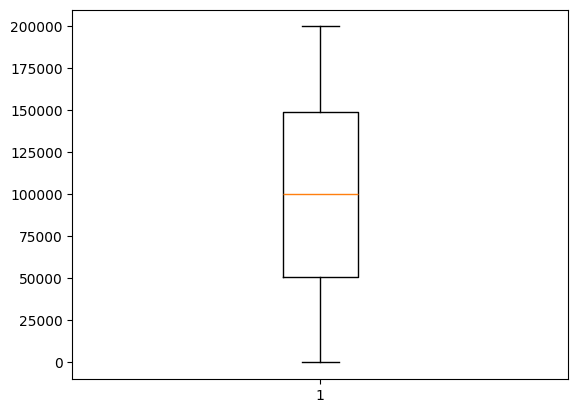

In [19]:
plt.Figure(figsize=(5, 4))
plt.boxplot(x=df['EstimatedSalary']);

**The box plot seems normal but the data is heavly skewd and the IQR method failed here**

C:\Users\mahmo\AppData\Local\Temp\ipykernel_15020\2866863002.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['EstimatedSalary'], shade=True)


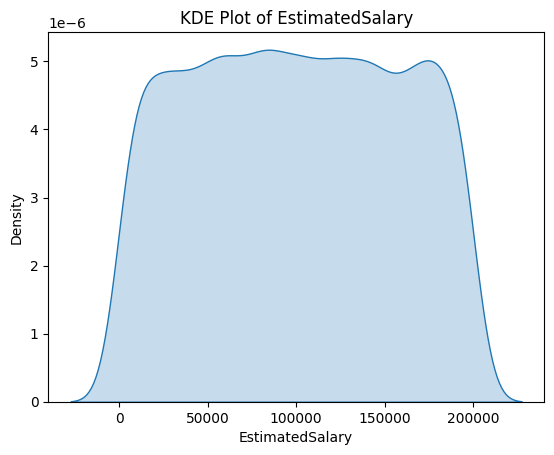

In [20]:
sns.kdeplot(df['EstimatedSalary'], shade=True)
plt.title('KDE Plot of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.show()

In [21]:
df['EstimatedSalary'].nsmallest(10)


2362     11.58
9647     90.07
9010     91.75
5548     96.27
4989    106.67
7565    123.07
2498    142.81
8722    143.34
4774    178.19
1451    216.27
Name: EstimatedSalary, dtype: float64

---

and it's look like that there is a lot of outliers in the estimated salary column
so i'm gonna cut off every salary lower than the minimum salary for each country

    'France': €17,981
    'Germany': €18,360
    'Spain': €12,021

---

In [22]:
country_min_salary = {
    'France': 17981,
    'Germany': 18360,
    'Spain': 12021
}

df = df[
    (df['Geography'] == 'France') & (df['EstimatedSalary'] >= 17981) |
    (df['Geography'] == 'Germany') & (df['EstimatedSalary'] >= 18360) |
    (df['Geography'] == 'Spain') & (df['EstimatedSalary'] >= 12021)
]



In [23]:
df['EstimatedSalary'].nsmallest(10)

2526    12048.67
6801    12156.93
8113    12162.76
564     12182.15
7922    12266.06
2250    12368.11
8355    12405.20
8852    12429.22
1968    12440.44
2775    12457.76
Name: EstimatedSalary, dtype: float64

**Visualisations**
---

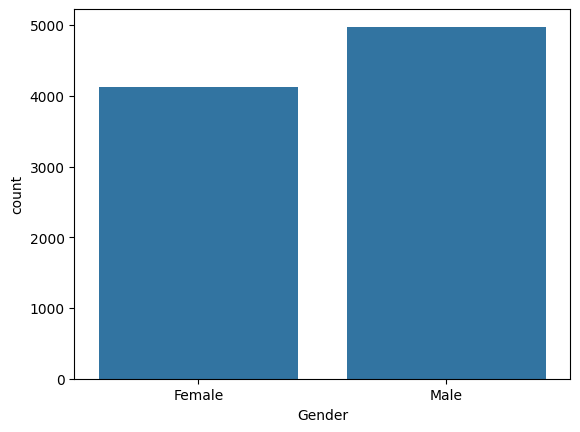

In [24]:
sns.countplot(data = df, x='Gender')
plt.show()

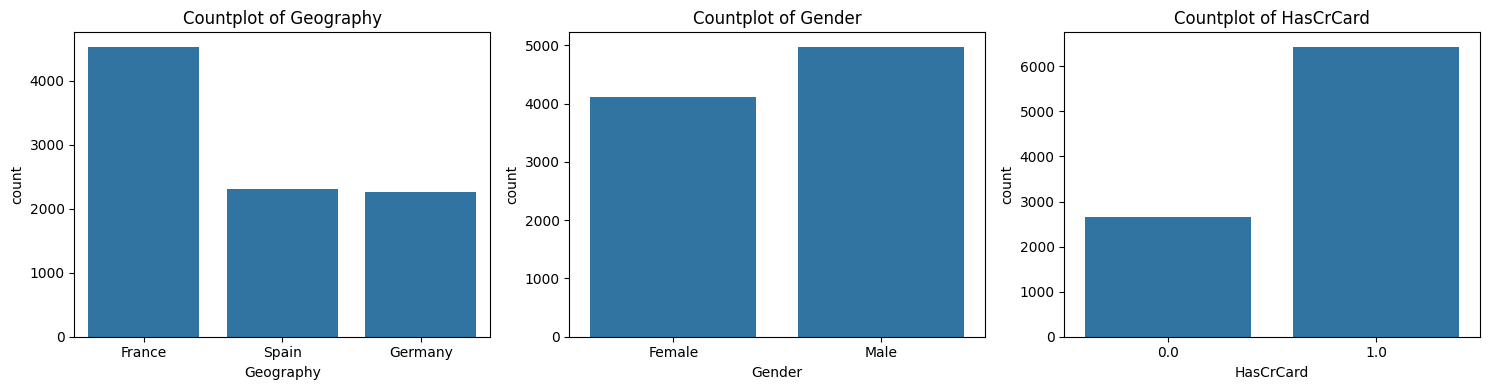

In [25]:
columns = ['Geography', 'Gender', 'HasCrCard']

fig, axes = plt.subplots(1, len(columns), figsize=(5 * len(columns), 4))

sns.countplot(data=df, x=columns[0], ax=axes[0])
axes[0].set_title(f'Countplot of {columns[0]}')

sns.countplot(data=df, x=columns[1], ax=axes[1])
axes[1].set_title(f'Countplot of {columns[1]}')

sns.countplot(data=df, x=columns[2], ax=axes[2])
axes[2].set_title(f'Countplot of {columns[2]}')

plt.tight_layout()
plt.show()

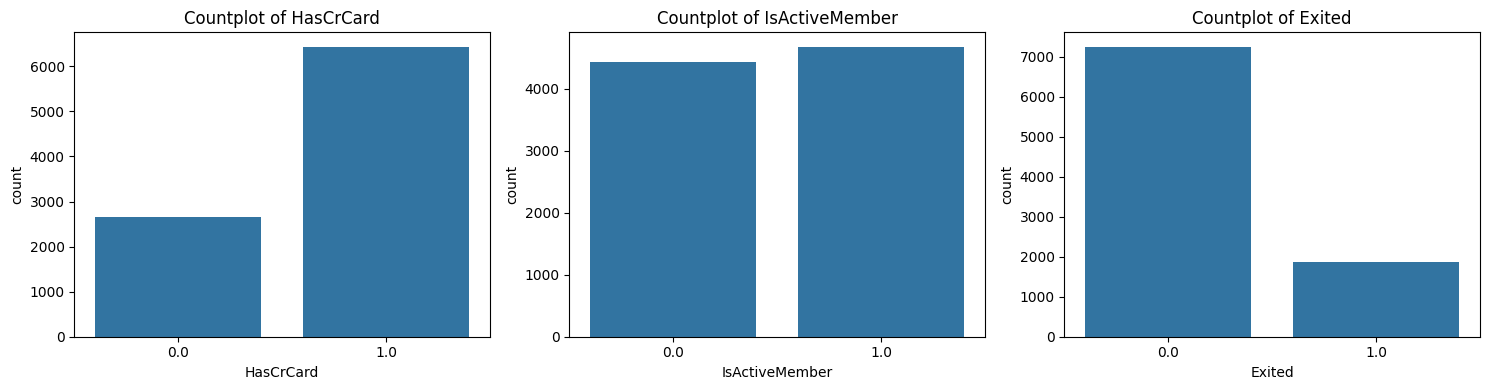

In [26]:
columns = ['HasCrCard', 'IsActiveMember', 'Exited']

fig, axes = plt.subplots(1, len(columns), figsize=(5 * len(columns), 4))

sns.countplot(data=df, x=columns[0], ax=axes[0])
axes[0].set_title(f'Countplot of {columns[0]}')

sns.countplot(data=df, x=columns[1], ax=axes[1])
axes[1].set_title(f'Countplot of {columns[1]}')

sns.countplot(data=df, x=columns[2], ax=axes[2])
axes[2].set_title(f'Countplot of {columns[2]}')

plt.tight_layout()
plt.show()

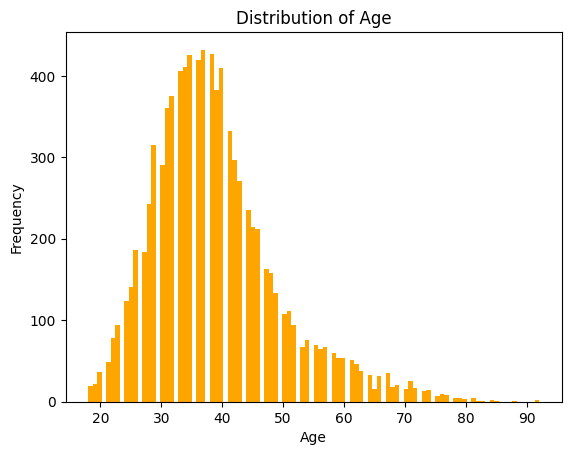

In [27]:
plt.hist(df['Age'], bins=100, color='orange')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

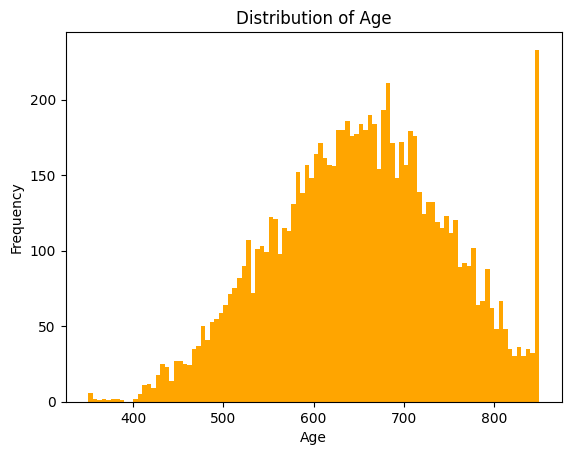

In [28]:
plt.hist(df['CreditScore'], bins=100, color='orange')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

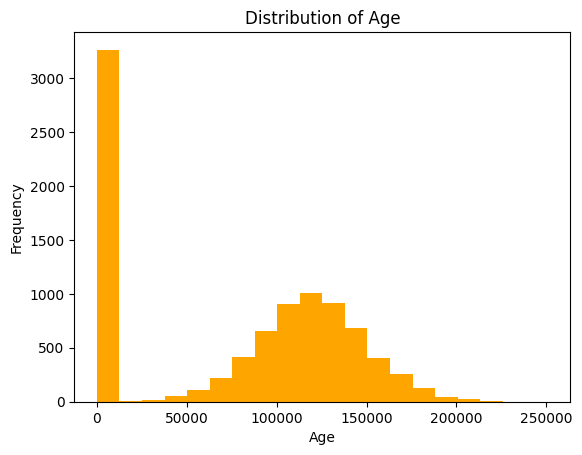

In [29]:
plt.hist(df['Balance'], bins=20, color='orange')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

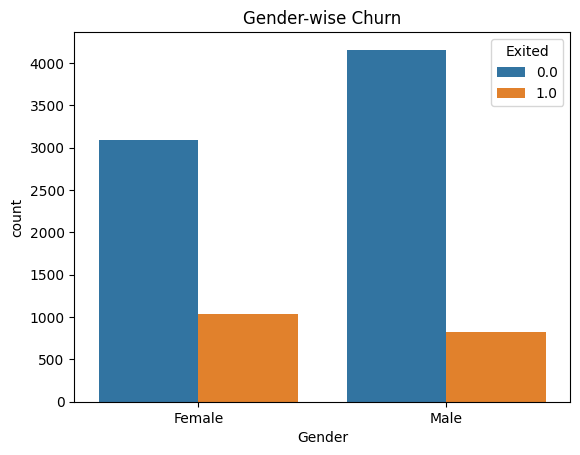

In [30]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title("Gender-wise Churn")
plt.show()

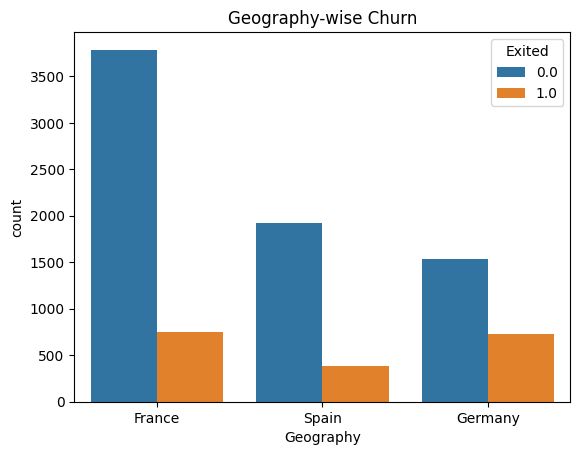

In [31]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title("Geography-wise Churn")
plt.show()

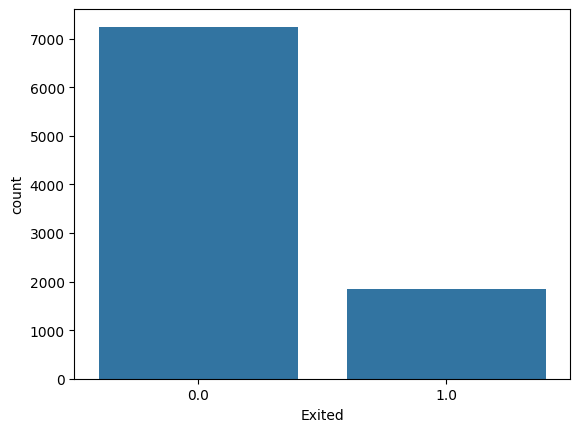

In [32]:
sns.countplot(data=df, x='Exited')
plt.show()

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [34]:
mulcols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
df[mulcols].corr()

,Age,CreditScore,Balance,EstimatedSalary
Age,1.000000,-0.005763,0.027023,-0.008875
CreditScore,-0.005763,1.000000,0.008556,-0.009270
Balance,0.027023,0.008556,1.000000,0.004995
EstimatedSalary,-0.008875,-0.009270,0.004995,1.000000


<Axes: >

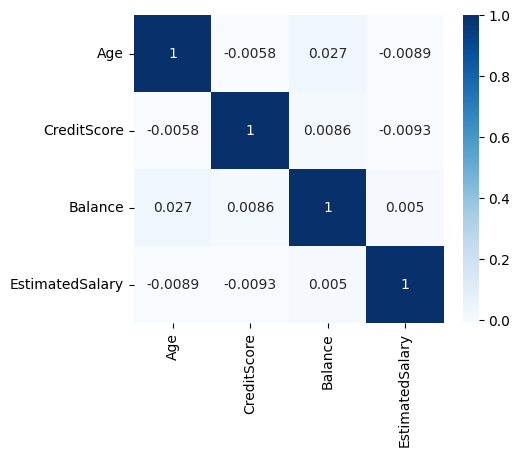

In [35]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(df[mulcols].corr(), annot=True ,cmap='Blues')

In [36]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [38]:
categorical_cols_for_encoding = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols_for_encoding)
print(df_encoded.columns)

df = df_encoded.copy()

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [39]:
# numerical_cols_for_scaling = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])



In [40]:
numerical_cols_for_scaling = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CreditScore'] = le.fit_transform(df['CreditScore'])
df['Age'] = le.fit_transform(df['Age'])
df['Balance'] = le.fit_transform(df['Balance'])
df['EstimatedSalary'] = le.fit_transform(df['EstimatedSalary'])


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop('Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=df['Exited'])
y_test.value_counts()

Exited
0.0    1449
1.0     371
Name: count, dtype: int64

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
yp=dt.predict(x_test)


print(classification_report(y_test, yp))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      1449
         1.0       0.49      0.57      0.52       371

    accuracy                           0.79      1820
   macro avg       0.69      0.71      0.69      1820
weighted avg       0.80      0.79      0.80      1820



In [43]:
from sklearn.ensemble import RandomForestClassifier
max = 0
acc = 0
for i in range(5, 150, 5):
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  yp=rf.predict(x_test)
  print(accuracy_score(y_test,yp))
  if accuracy_score(y_test,yp) > acc:
    acc = accuracy_score(y_test,yp)
    max = i
print(acc)
print(max)

0.8252747252747252
0.8456043956043956
0.85
0.8445054945054945
0.8510989010989011
0.8543956043956044
0.8598901098901099
0.8532967032967033
0.8516483516483516
0.8587912087912087
0.8571428571428571
0.8494505494505494
0.85
0.8510989010989011
0.8472527472527472
0.8604395604395605
0.8532967032967033
0.8631868131868132
0.8576923076923076
0.8576923076923076
0.8554945054945055
0.8593406593406593
0.8549450549450549
0.8538461538461538
0.8593406593406593
0.8549450549450549
0.8571428571428571
0.8543956043956044
0.8554945054945055
0.8631868131868132
90


In [44]:
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression()
dt.fit(x_train,y_train)
yp=dt.predict(x_test)

print(classification_report(y_test, yp))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1449
         1.0       0.60      0.09      0.16       371

    accuracy                           0.80      1820
   macro avg       0.70      0.54      0.52      1820
weighted avg       0.77      0.80      0.74      1820



c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



KNeighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      1449
         1.0       0.22      0.07      0.11       371

    accuracy                           0.76      1820
   macro avg       0.51      0.50      0.48      1820
weighted avg       0.68      0.76      0.71      1820

KNeighbors Accuracy: 0.7599
KNeighbors ROC AUC Score: 0.5036


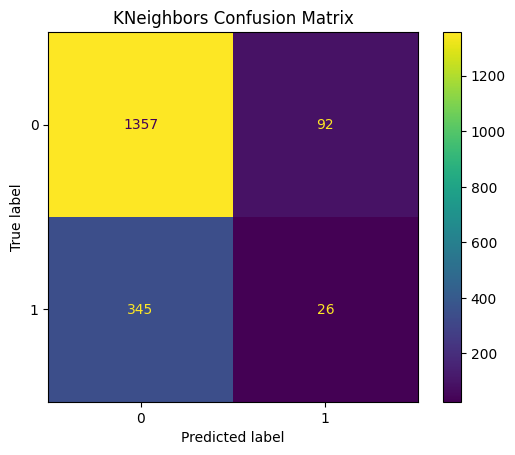


SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1449
         1.0       0.00      0.00      0.00       371

    accuracy                           0.80      1820
   macro avg       0.40      0.50      0.44      1820
weighted avg       0.63      0.80      0.71      1820

SVC Accuracy: 0.7962
SVC ROC AUC Score: 0.6122


c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

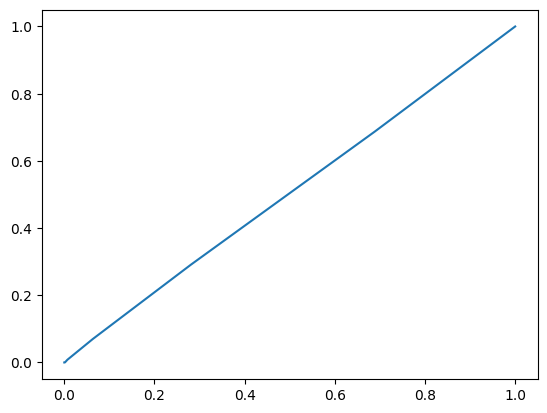

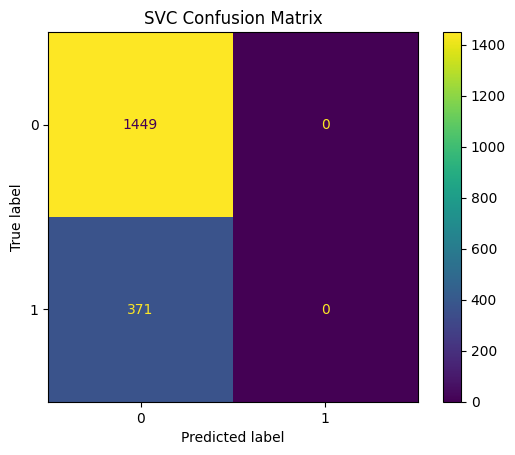


GradientBoosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1449
         1.0       0.77      0.47      0.59       371

    accuracy                           0.86      1820
   macro avg       0.83      0.72      0.75      1820
weighted avg       0.86      0.86      0.85      1820

GradientBoosting Accuracy: 0.8643
GradientBoosting ROC AUC Score: 0.8589


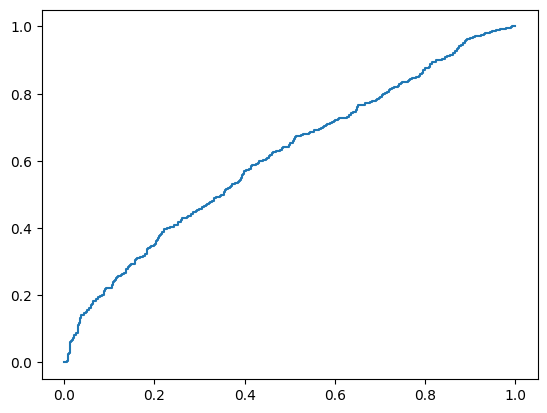

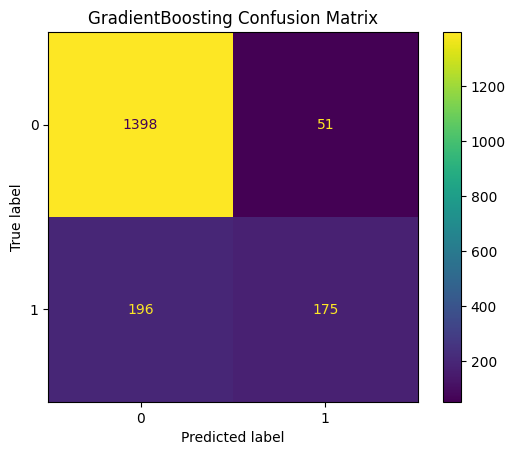

c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:21:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1449
         1.0       0.67      0.51      0.58       371

    accuracy                           0.85      1820
   macro avg       0.77      0.72      0.74      1820
weighted avg       0.84      0.85      0.84      1820

XGBoost Accuracy: 0.8484
XGBoost ROC AUC Score: 0.8312


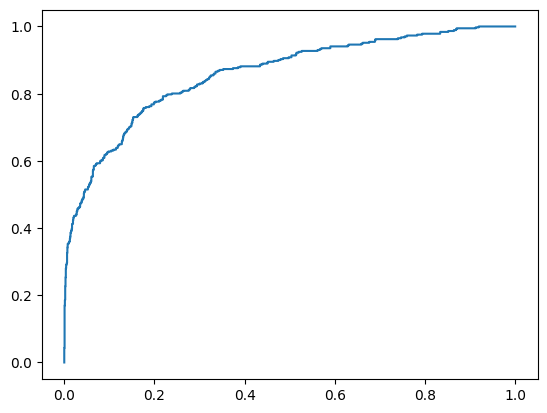

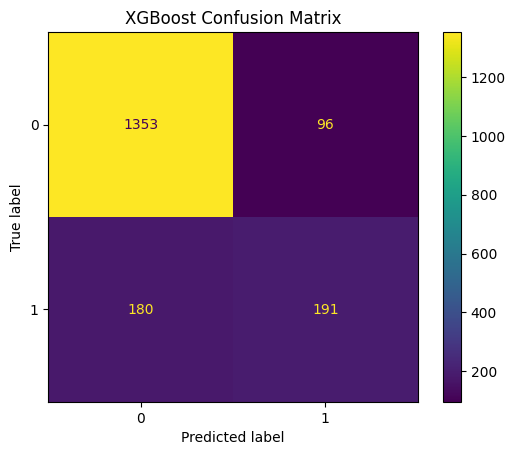

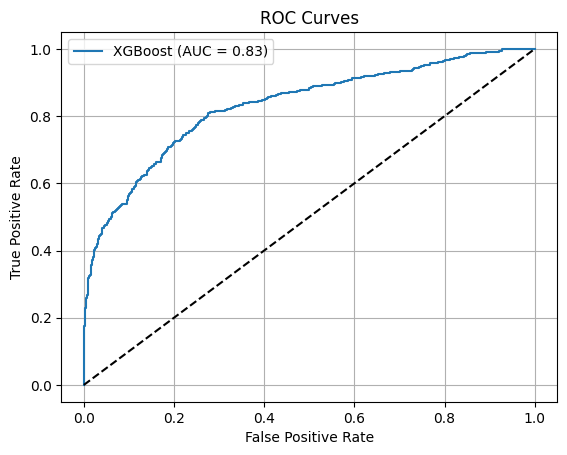

In [46]:

# Additional Classification Models and Evaluation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

models = {
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()
